In [15]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
kaggle_survey = pd.read_csv('kaggle-survey-2019/multiple_choice_responses.csv')
kaggle_survey.head()

,Duration,Age,Gender,Country
0,23,18-21,Male,Ukraine
1,24,18-21,Male,United States of America
2,24,30-34,Male,Japan
3,25,25-29,Male,United States of America
4,25,35-39,Male,Belarus


In [3]:
#kaggle_survey = kaggle_survey [["Duration (in seconds)", "What is your age (# years)?", "What is your gender? - Selected Choice", "In which country do you currently reside?"]]

In [36]:
X = kaggle_survey[["Gender", "Age"]]
y = kaggle_survey["Duration"].values.reshape(-1, 1)
print(X.shape, y.shape)

(19350, 2) (19350, 1)


In [37]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Gender"])
data_binary_encoded.head()

,Age,Gender_Female,Gender_Male
0,18-21,0,1
1,18-21,0,1
2,30-34,0,1
3,25-29,0,1
4,35-39,0,1


In [38]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Gender_Female,Gender_Male,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-69,Age_70
0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Gender_Female,Gender_Male,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-69,Age_70
12369,0,1,0,0,1,0,0,0,0,0,0,0,0
3813,0,1,0,0,0,0,1,0,0,0,0,0,0
796,0,1,0,0,0,0,1,0,0,0,0,0,0
15602,0,1,0,0,0,0,1,0,0,0,0,0,0
14630,0,1,0,0,0,0,0,1,0,0,0,0,0


In [40]:
 from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [41]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

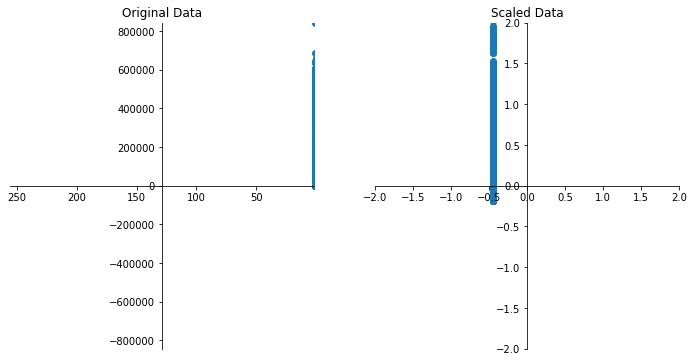

In [42]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Gender_Male"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Gender_Male"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [43]:
X = pd.get_dummies(kaggle_survey[["Gender", "Age"]])
y = kaggle_survey["Duration"].values.reshape(-1, 1)
X.head()

,Gender_Female,Gender_Male,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-69,Age_70
0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
 from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

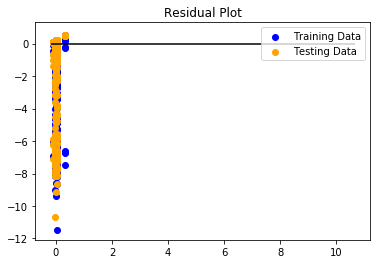

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2184038991376054, R2: -0.0027141035351954113


In [48]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[3.01988780e+12 3.01988780e+12 3.48679868e+10 4.02309154e+10
  4.35470944e+10 3.77776809e+10 3.19465290e+10 2.68596710e+10
  2.20198750e+10 1.91873193e+10 1.48562837e+10 1.36255260e+10
  6.83118873e+09]]
y-axis intercept:  [0.00055692]


In [21]:
#model.save("ims_model_trained.h5")